In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Part 1

### Hyung C. Park (hcp084)

### Enumeration

In [2]:
val = [0]*201
next_val = [0]*201
discount_rate = 0.95

for iteration in reversed(range(0, 501)):
    for state in range(0,201):
        possible_values_0 = []
        possible_values_1 = []
        for i in range(1,6):
            possible_values_0 = []
            possible_next_state = state + i
            if (possible_next_state >= 0) and (possible_next_state <= 200):
                possible_values_0.append(discount_rate * val[possible_next_state])
            possible_next_state -= 15
            if possible_next_state < 0:
                possible_next_state = 0
            possible_values_1.append(discount_rate * val[possible_next_state])
        if (len(possible_values_0) > 0) and (len(possible_values_1) > 0):
            next_val[state] = max([-2 * state + sum(possible_values_0) / len(possible_values_0),
                              -2 * state - 100 + sum(possible_values_1) / len(possible_values_1)])
        elif len(possible_values_0) > 0:
            next_val[state] = -2 * state + sum(possible_values_0) / len(possible_values_0)
        elif len(possible_values_1) > 0:
            next_val[state] = -2 * state - 100 + sum(possible_values_1) / len(possible_values_1)
    val = next_val.copy()

Text(0, 0.5, 'Optimal Value Function')

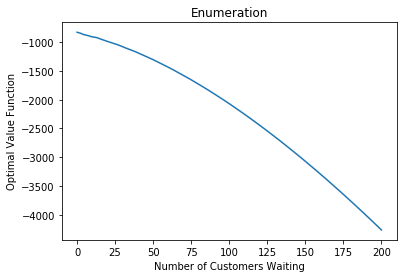

In [3]:
plt.plot(range(0,201), val)
plt.title("Enumeration")
plt.xlabel('Number of Customers Waiting')
plt.ylabel('Optimal Value Function')

In [4]:
val = [0]*201
next_val = [0]*201
discount_rate = 0.95
epsil = 1e-15

iteration = 0

while True:
#     for state in range(0,201):
#         possible_values_0 = []
#         possible_values_1 = []
#         for i in range(1,6):
#             possible_values_0 = []
#             possible_next_state = state + i
#             if (possible_next_state >= 0) and (possible_next_state <= 200):
#                 possible_values_0.append(discount_rate * val[possible_next_state])
#             possible_next_state -= 15
#             if possible_next_state >= 0:
#                 possible_values_1.append(discount_rate * val[possible_next_state])
#         if (len(possible_values_0) > 0) and (len(possible_values_1) > 0):
#             next_val[state] = max([-2 * state + sum(possible_values_0) / len(possible_values_0),
#                               -2 * state - 50 + sum(possible_values_1) / len(possible_values_1)])
#         elif len(possible_values_0) > 0:
#             next_val[state] = -2 * state + sum(possible_values_0) / len(possible_values_0)
#         elif len(possible_values_1) > 0:
#             next_val[state] = -2 * state - 50 + sum(possible_values_1) / len(possible_values_1)
#     if (np.sum(np.abs(np.array(val) - np.array(next_val))) < epsil):
#         break
#     val = next_val

    for state in range(0,201):
        possible_values_0 = []
        possible_values_1 = []
        for i in range(1,6):
            possible_next_state = state + i
            if (possible_next_state >= 0) and (possible_next_state <= 200):
                possible_values_0.append(discount_rate * val[possible_next_state])
            possible_next_state -= 15
            if possible_next_state < 0:
                possible_next_state = 0
            possible_values_1.append(discount_rate * val[possible_next_state])
        if (len(possible_values_0) > 0) and (len(possible_values_1) > 0):
            next_val[state] = max([-2 * state + sum(possible_values_0) / len(possible_values_0),
                              -2 * state - 100 + sum(possible_values_1) / len(possible_values_1)])
        elif len(possible_values_0) > 0:
            next_val[state] = -2 * state + sum(possible_values_0) / len(possible_values_0)
        elif len(possible_values_1) > 0:
            next_val[state] = -2 * state - 100 + sum(possible_values_1) / len(possible_values_1)
    if (np.sum(np.abs(np.array(val) - np.array(next_val))) < epsil):
        break
    val = next_val.copy()
    iteration += 1
# val

Text(0, 0.5, 'Optimal Value Function')

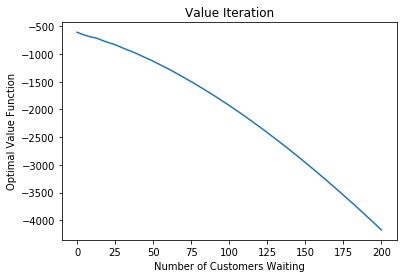

In [5]:
plt.plot(range(0,201), val)
plt.title("Value Iteration")
plt.xlabel('Number of Customers Waiting')
plt.ylabel('Optimal Value Function')

In [6]:
val = [0]*201
old_action = [0]*201
new_action = [0]*201
discount_rate = 0.95

iteration = 0

while True:
    for state in range(0,201):
        possible_values_0 = []
        possible_values_1 = []
        for i in range(1,6):
            possible_next_state = state + i
            if (possible_next_state >= 0) and (possible_next_state <= 200):
                possible_values_0.append(discount_rate * val[possible_next_state])
            possible_next_state -= 15
            if possible_next_state < 0:
                possible_next_state = 0
            possible_values_1.append(discount_rate * val[possible_next_state])
        if (len(possible_values_0) > 0) and (len(possible_values_1) > 0):
            val[state] = max([-2 * state + sum(possible_values_0) / len(possible_values_0),
                              -2 * state - 100 + sum(possible_values_1) / len(possible_values_1)])
            new_action[state] = (-2 * state + sum(possible_values_0) / len(possible_values_0) < \
                              -2 * state - 100 + sum(possible_values_1) / len(possible_values_1)) * 1
        elif len(possible_values_0) > 0:
            val[state] = -2 * state + sum(possible_values_0) / len(possible_values_0)
            new_action[state] = 0
        elif len(possible_values_1) > 0:
            val[state] = -2 * state - 100 + sum(possible_values_1) / len(possible_values_1)
            new_action[state] = 1
        
    if (new_action == old_action) or iteration > 100:
        break
    
    iteration += 1
    
    old_action = new_action.copy()

Text(0, 0.5, 'Optimal Policy')

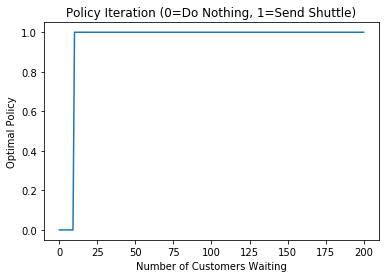

In [7]:
plt.plot(range(0,201), new_action)
plt.title("Policy Iteration (0=Do Nothing, 1=Send Shuttle)")
plt.xlabel('Number of Customers Waiting')
plt.ylabel('Optimal Policy')

Text(0, 0.5, 'Optimal Value Function')

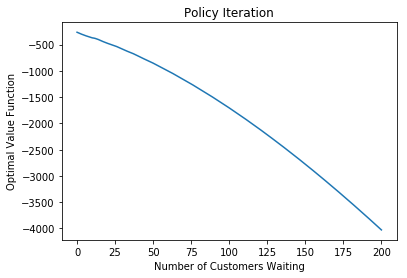

In [8]:
plt.plot(range(0,201), val)
plt.title("Policy Iteration")
plt.xlabel('Number of Customers Waiting')
plt.ylabel('Optimal Value Function')

##### We can see that the enumeration, value iteration, and policy iteration functions all converge to the same optimal value function, which we expected. Also, the optimal policy is to start sending shuttles from the 11 or more people standing in line

# Part 2

Assume that there are 5 types of customers with ch = {1, 1.5, 2, 2.5, 3} and each type can have maximum 100 people of each class waiting for shuttle and At for each class follows same distribution. Capacity of the shuttle is K = 30.

##### I had to interrupt because it couldn't even run through one iteration. Even for 1 iteration, it has to go through all of the states (101^5) and calculate the value/policy for each possible state. So we small changes to the problem has an enormous impact on computational complexity.

### Enumeration

In [12]:
next_val = np.zeros((101, 101, 101, 101, 101))
val = np.zeros((101, 101, 101, 101, 101))

discount_rate = 0.95

for iteration in reversed(range(0, 501)):
    for ind, item in np.ndenumerate(val):
        possible_next_states = []
        possible_values_0 = []
        possible_values_1 = []
        current_state = list(ind)
        
        for j in range(0,5):
            possible_next_state = list(ind)
            possible_next_state[j] = possible_next_state[j] + 1
            if (possible_next_state[j] >= 0) and (possible_next_state[j] <= 100):
                possible_next_states.append(possible_next_state)
                possible_values_0.append(sum([(ind[0]+2)/-2.0 * item for ind, item in np.ndenumerate(possible_next_state)]) \
                + discount_rate * next_val[tuple(possible_next_state)])
            if ((possible_next_state[j] - 15) >= 0):
                possible_next_state[j] = possible_next_state[j] - 30
                possible_next_states.append(possible_next_state)
                possible_values_1.append(sum([(ind[0]+2)/-2.0 * item for ind, item in np.ndenumerate(possible_next_state)]) \
                + discount_rate * next_val[tuple(possible_next_state)] - 100)
        for i in range(1,5):
            poss_next_states = possible_next_states.copy()
            possible_next_states = []
            for j in range(0,5):
                for item in poss_next_states:
                    possible_next_state = item.copy()
                    possible_next_state[j] = possible_next_state[j] + 1
                    if (possible_next_state[j] >= 0) and (possible_next_state[j] <= 100):
                        possible_next_states.append(possible_next_state)
                        possible_values_0.append(sum([(ind[0]+2)/-2.0 * item for ind, item in np.ndenumerate(possible_next_state)]) \
                        + discount_rate * next_val[tuple(possible_next_state)])
                    if ((possible_next_state[j] - 15) >= 0):
                        possible_next_state[j] = possible_next_state[j] - 30
                        possible_next_states.append(possible_next_state)
                        possible_values_1.append(sum([(ind[0]+2)/-2.0 * item for ind, item in np.ndenumerate(possible_next_state)]) \
                        + discount_rate * next_val[tuple(possible_next_state)] - 100)
        if ((len(possible_values_1) > 0) and (len(possible_values_0) > 0)):
            next_val[ind] = max((sum(possible_values_1)/len(possible_values_1)),
                                (sum(possible_values_0)/len(possible_values_0)))
        elif (len(possible_values_1) > 0):
            next_val[ind] = (sum(possible_values_1)/len(possible_values_1))
        elif (len(possible_values_0) > 0):
            next_val[ind] = (sum(possible_values_0)/len(possible_values_0))
    val = next_val
    print(iteration)
    
    

KeyboardInterrupt: 

In [11]:
next_val = np.zeros((101, 101, 101, 101, 101))
val = np.zeros((101, 101, 101, 101, 101))

discount_rate = 0.95

for iteration in reversed(range(0, 501)):
    for ind, item in np.ndenumerate(val):
        possible_next_states = []
        possible_values_0 = []
        possible_values_1 = []
        current_state = list(ind)
        
        for j in range(0,5):
            possible_next_state = list(ind)
            possible_next_state[j] = possible_next_state[j] + 1
            if (possible_next_state[j] >= 0) and (possible_next_state[j] <= 100):
                possible_next_states.append(possible_next_state)
                possible_values_0.append(sum([(ind[0]+2)/-2.0 * item for ind, item in np.ndenumerate(possible_next_state)]) \
                + discount_rate * next_val[tuple(possible_next_state)])
            if ((possible_next_state[j] - 15) >= 0):
                possible_next_state[j] = possible_next_state[j] - 30
                possible_next_states.append(possible_next_state)
                possible_values_1.append(sum([(ind[0]+2)/-2.0 * item for ind, item in np.ndenumerate(possible_next_state)]) \
                + discount_rate * next_val[tuple(possible_next_state)] - 100)
        for i in range(1,5):
            poss_next_states = possible_next_states.copy()
            possible_next_states = []
            for j in range(0,5):
                for item in poss_next_states:
                    possible_next_state = item.copy()
                    possible_next_state[j] = possible_next_state[j] + 1
                    if (possible_next_state[j] >= 0) and (possible_next_state[j] <= 100):
                        possible_next_states.append(possible_next_state)
                        possible_values_0.append(sum([(ind[0]+2)/-2.0 * item for ind, item in np.ndenumerate(possible_next_state)]) \
                        + discount_rate * next_val[tuple(possible_next_state)])
                    if ((possible_next_state[j] - 15) >= 0):
                        possible_next_state[j] = possible_next_state[j] - 30
                        possible_next_states.append(possible_next_state)
                        possible_values_1.append(sum([(ind[0]+2)/-2.0 * item for ind, item in np.ndenumerate(possible_next_state)]) \
                        + discount_rate * next_val[tuple(possible_next_state)] - 100)
        if ((len(possible_values_1) > 0) and (len(possible_values_0) > 0)):
            next_val[ind] = max((sum(possible_values_1)/len(possible_values_1)),
                                (sum(possible_values_0)/len(possible_values_0)))
        elif (len(possible_values_1) > 0):
            next_val[ind] = (sum(possible_values_1)/len(possible_values_1))
        elif (len(possible_values_0) > 0):
            next_val[ind] = (sum(possible_values_0)/len(possible_values_0))
    if (np.sum(np.abs(val - next_val)) < epsil):
        break
    val = next_val
    print(iteration)
    iteration += 1

KeyboardInterrupt: 

In [13]:
next_val = np.zeros((101, 101, 101, 101, 101))
val = np.zeros((101, 101, 101, 101, 101))

discount_rate = 0.95
iteration = 0

while True:
    for ind, item in np.ndenumerate(val):
        possible_next_states = []
        possible_values_0 = []
        possible_values_1 = []
        current_state = list(ind)
        
        for j in range(0,5):
            possible_next_state = list(ind)
            possible_next_state[j] = possible_next_state[j] + 1
            if (possible_next_state[j] >= 0) and (possible_next_state[j] <= 100):
                possible_next_states.append(possible_next_state)
                possible_values_0.append(sum([(ind[0]+2)/-2.0 * item for ind, item in np.ndenumerate(possible_next_state)]) \
                + discount_rate * next_val[tuple(possible_next_state)])
            if ((possible_next_state[j] - 15) >= 0):
                possible_next_state[j] = possible_next_state[j] - 30
                possible_next_states.append(possible_next_state)
                possible_values_1.append(sum([(ind[0]+2)/-2.0 * item for ind, item in np.ndenumerate(possible_next_state)]) \
                + discount_rate * next_val[tuple(possible_next_state)] - 100)
        for i in range(1,5):
            poss_next_states = possible_next_states.copy()
            possible_next_states = []
            for j in range(0,5):
                for item in poss_next_states:
                    possible_next_state = item.copy()
                    possible_next_state[j] = possible_next_state[j] + 1
                    if (possible_next_state[j] >= 0) and (possible_next_state[j] <= 100):
                        possible_next_states.append(possible_next_state)
                        possible_values_0.append(sum([(ind[0]+2)/-2.0 * item for ind, item in np.ndenumerate(possible_next_state)]) \
                        + discount_rate * next_val[tuple(possible_next_state)])
                    if ((possible_next_state[j] - 15) >= 0):
                        possible_next_state[j] = possible_next_state[j] - 30
                        possible_next_states.append(possible_next_state)
                        possible_values_1.append(sum([(ind[0]+2)/-2.0 * item for ind, item in np.ndenumerate(possible_next_state)]) \
                        + discount_rate * next_val[tuple(possible_next_state)] - 100)
        if ((len(possible_values_1) > 0) and (len(possible_values_0) > 0)):
            next_val[ind] = 1*((sum(possible_values_1)/len(possible_values_1)) > \
                                (sum(possible_values_0)/len(possible_values_0)))
        elif (len(possible_values_1) > 0):
            next_val[ind] = 1
        elif (len(possible_values_0) > 0):
            next_val[ind] = 0
    val = next_val
    if np.array_equal(next_val, val):
        break
    val = next_val
    print(iteration)
    iteration += 1

KeyboardInterrupt: 